In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.io import loadmat
import itertools
from statsmodels.distributions.empirical_distribution import ECDF


In [15]:
path = "/media/dan/Data2/calculations/connectivity/additional_calcs/thresholded_mats/bary-sq_euclidean_max"
files = sorted(os.listdir(path))

data = {}
for file in tqdm(files):
    if file.endswith(".npy"):
        # file format: base_name + ~{pid}~{i:06}~threshadj~{removal_order}~{step}.npy 
        # example bary-sq_euclidean_max~001~000000~threshadj~lowest~5587.npy
        # extract pid,  i, step
        pid = int(file.split("~")[1])
        i = int(file.split("~")[2])
        step = int(file.split("~")[5].split(".")[0])
        if pid not in data:
            data[pid] = {'net': [], 'steps': []}
        with open(os.path.join(path, file), "rb") as f:
            net = np.load(f)
        data[pid]['net'].append(net)
        data[pid]['steps'].append(step)



100%|██████████| 41549/41549 [00:19<00:00, 2103.60it/s]


In [40]:
# load soz
soz_path = "/media/dan/Data2/calculations/connectivity/additional_calcs/mats/bary-sq_euclidean_max"
files = sorted(os.listdir(soz_path))
for file in tqdm(files):
    if file.endswith(".mat"):
        # file format: base_name + ~{pid}.mat
        # example pdist_euclidean~001.mat
        # extract pid
        base = file.split(".")[0]
        pid = int(base.split("~")[1])
        data[pid]['soz'] = loadmat(os.path.join(soz_path, file))['soz']

100%|██████████| 69/69 [00:04<00:00, 15.76it/s]


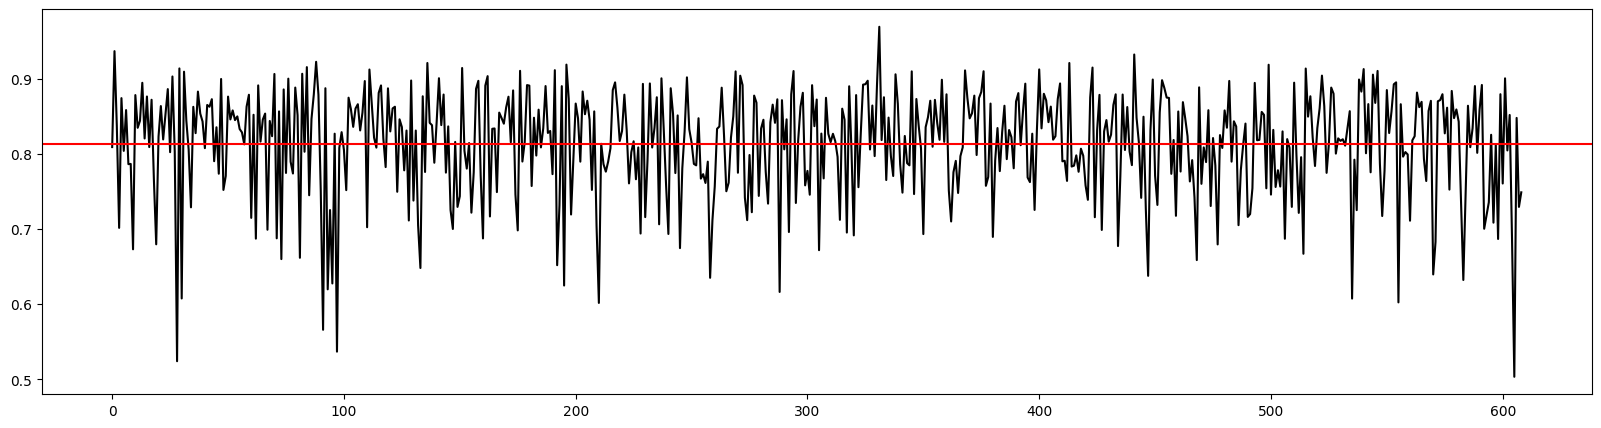

In [52]:
plt.figure(figsize=(20, 5))
lst = []
for pid in data:
    n = data[pid]['net'][0].shape[0]
    # number of possible is n*(n-1)/2
    possible_edges = n*(n-1)/2
    plt.plot(np.array(data[pid]['steps'])/possible_edges, label=f"pid {pid}", alpha=1, color='k')
    lst.extend(np.array(data[pid]['steps'])/possible_edges)
    break
lst = np.array(lst)
plt.axhline(np.mean(lst, axis=0), label='mean', color='r')
# plt.legend()
plt.show()


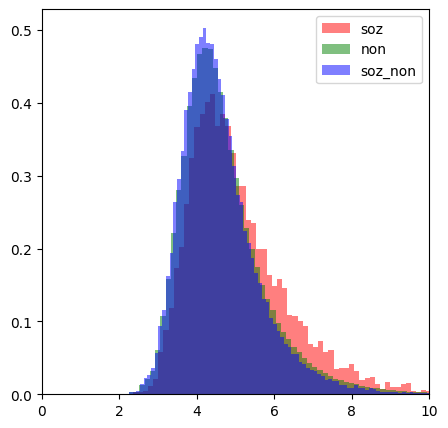

In [85]:
# break network into soz and non and soz->non/non->soz
for pid in data:
    n = data[pid]['net'][0].shape[0]
    soz = data[pid]['soz'][0]
    idxs = np.arange(n)
    soz_idx = idxs[soz == 1]
    non_idx = idxs[soz == 0]

    # all two pair combinations of soz_idx (remove self-edges)
    soz_edges = np.array(list(itertools.combinations(soz_idx, 2)))
    soz_edges = soz_edges[soz_edges[:, 0] != soz_edges[:, 1]]

    # all two pair combinations of non_soz_idx (remove self-edges)
    non_edges = np.array(list(itertools.combinations(non_idx, 2)))
    non_edges = non_edges[non_edges[:, 0] != non_edges[:, 1]]

    # all two pair combinations of soz_idx and non_soz_idx (remove self-edges)
    soz_non_edges = np.array(list(itertools.product(soz_idx, non_idx)))
    soz_non_edges = soz_non_edges[soz_non_edges[:, 0] != soz_non_edges[:, 1]]

    # ecdf of network
    soz = []
    non = []
    soz_non = []
    for net in data[pid]['net']:
        tmp = net[soz_edges[:, 0], soz_edges[:, 1]]
        # remove nans
        tmp = tmp[~np.isnan(tmp)]
        soz.extend(tmp)
        tmp = net[non_edges[:, 0], non_edges[:, 1]]
        tmp = tmp[~np.isnan(tmp)]
        non.extend(tmp)
        tmp = net[soz_non_edges[:, 0], soz_non_edges[:, 1]]
        tmp = tmp[~np.isnan(tmp)]
        soz_non.extend(tmp)

    soz = np.array(soz)
    non = np.array(non)
    soz_non = np.array(soz_non)

    # ecdf of network
    plt.figure(figsize=(5, 5))
    # for arr, label, color in [(soz, 'soz', 'r'), (non, 'non', 'g'), (soz_non, 'soz_non', 'b')]:
    #     ecdf_func = ECDF(arr)
    #     plt.plot(ecdf_func.x, ecdf_func.y, label=f"{label}", color=color)
    # plt.xlim(0, 10)

    # histogram of each
    plt.hist(soz, bins=1000, label='soz', color='r', alpha=0.5, density=True)
    plt.hist(non, bins=1000, label='non', color='g', alpha=0.5, density=True)
    plt.hist(soz_non, bins=1000, label='soz_non', color='b', alpha=0.5, density=True)
    plt.legend()
    plt.xlim(0, 10)
    plt.show()
    break

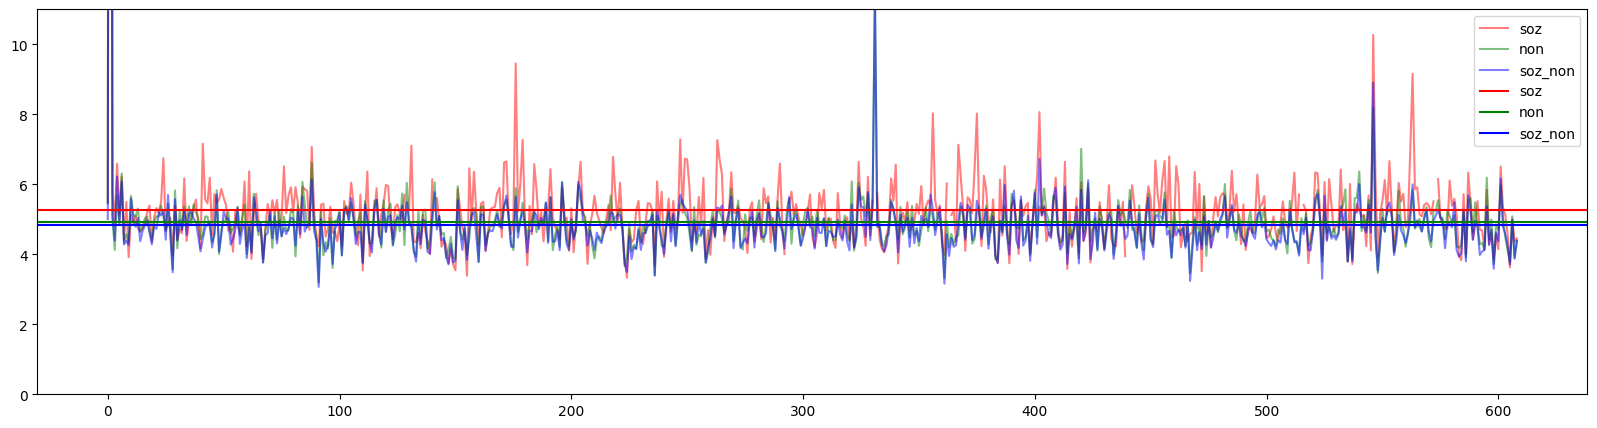

In [99]:
# break network into soz and non and soz->non/non->soz
for pid in data:
    n = data[pid]['net'][0].shape[0]
    soz = data[pid]['soz'][0]
    idxs = np.arange(n)
    soz_idx = idxs[soz == 1]
    non_idx = idxs[soz == 0]

    # all two pair combinations of soz_idx (remove self-edges)
    soz_edges = np.array(list(itertools.combinations(soz_idx, 2)))
    soz_edges = soz_edges[soz_edges[:, 0] != soz_edges[:, 1]]

    # all two pair combinations of non_soz_idx (remove self-edges)
    non_edges = np.array(list(itertools.combinations(non_idx, 2)))
    non_edges = non_edges[non_edges[:, 0] != non_edges[:, 1]]

    # all two pair combinations of soz_idx and non_soz_idx (remove self-edges)
    soz_non_edges = np.array(list(itertools.product(soz_idx, non_idx)))
    soz_non_edges = soz_non_edges[soz_non_edges[:, 0] != soz_non_edges[:, 1]]

    # ecdf of network

    for net in data[pid]['net']:
        tmp = net[soz_edges[:, 0], soz_edges[:, 1]]
        # remove nans
        tmp = tmp[~np.isnan(tmp)]
        soz.append(np.mean(tmp))
        tmp = net[non_edges[:, 0], non_edges[:, 1]]
        tmp = tmp[~np.isnan(tmp)]
        non.append(np.mean(tmp))
        tmp = net[soz_non_edges[:, 0], soz_non_edges[:, 1]]
        tmp = tmp[~np.isnan(tmp)]
        soz_non.append(np.mean(tmp))

    soz = np.array(soz)
    non = np.array(non)
    soz_non = np.array(soz_non)

    # ecdf of network
    plt.figure(figsize=(20, 5))
    plt.plot(soz, label='soz', color='r', alpha=0.5)
    plt.plot(non, label='non', color='g', alpha=0.5)
    plt.plot(soz_non, label='soz_non', color='b', alpha=0.5)
    plt.axhline(np.nanmean(soz), label='soz', color='r')
    plt.axhline(np.nanmean(non), label='non', color='g')
    plt.axhline(np.nanmean(soz_non), label='soz_non', color='b')
    plt.legend()
    plt.ylim(0, 11)
    plt.show()
    
    break

/tmp/ipykernel_153754/3471888773.py:6: RuntimeWarning: Mean of empty slice
  mean_network = np.nanmean(networks, axis=0)


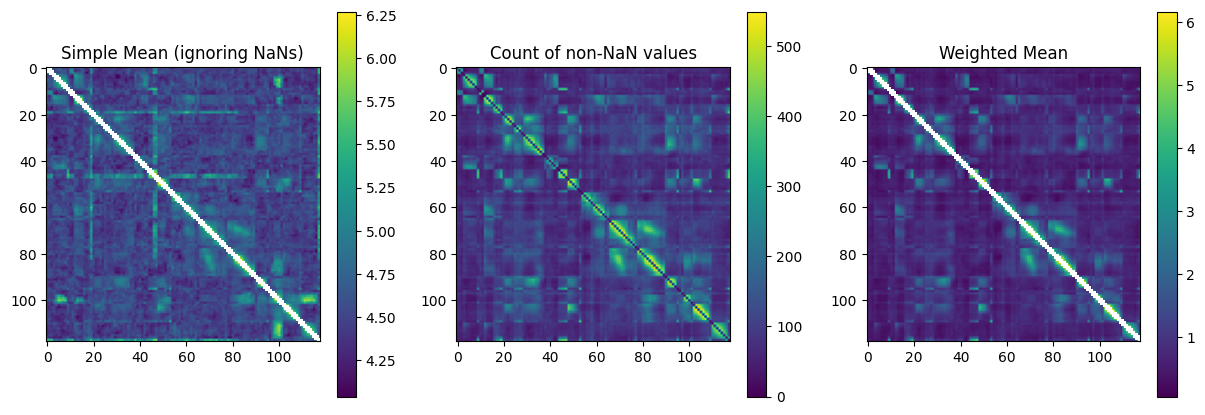

In [104]:
# Convert the networks into a time series array and calculate weighted mean
networks = np.array(data[pid]['net'])  # Shape: (time, c, c)

# Calculate the mean ignoring NaN values
# nanmean will properly handle NaN values by excluding them from the calculation
mean_network = np.nanmean(networks, axis=0)

# If you want to weight based on number of non-NaN observations
# Count number of non-NaN values for each edge
non_nan_counts = np.sum(~np.isnan(networks), axis=0)  # Shape: (c, c)

# Calculate weighted mean
weighted_mean = mean_network * (non_nan_counts / np.max(non_nan_counts))

# Visualize the results
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(mean_network)
plt.colorbar()
plt.title('Simple Mean (ignoring NaNs)')

plt.subplot(132)
plt.imshow(non_nan_counts)
plt.colorbar()
plt.title('Count of non-NaN values')

plt.subplot(133)
plt.imshow(weighted_mean)
plt.colorbar()
plt.title('Weighted Mean')
plt.show()

In [108]:
import networkx as nx

# Create a new directed graph
G = nx.Graph()

# Get the dimensions of the weighted_mean matrix
n = weighted_mean.shape[0]

# Add nodes with their SOZ status as an attribute
for i in range(n):
    G.add_node(i, soz=(data[pid]['soz'][0][i]))

# Add edges with weights from the weighted_mean matrix
for i in range(n):
    for j in range(i+1, n):  # Use i+1 to avoid duplicate edges since this is undirected
        if not np.isnan(weighted_mean[i,j]):  # Only add edges where we have a value
            G.add_edge(i, j, weight=weighted_mean[i,j])

# Save the network
output_file = "weighted_mean_network.gexf"
nx.write_gexf(G, output_file)
print(f"Network saved to {output_file}")

Network saved to weighted_mean_network.gexf


In [126]:


# Create a dynamic graph
G = nx.Graph()
n = networks.shape[1]  # number of nodes

# Add nodes with their SOZ status as an attribute
for i in range(n):
    G.add_node(i, soz=(data[pid]['soz'][0][i]))

# Create dynamic graph by adding edges with timestamps
dynamic_edges = []
for t in range(len(networks)):  # iterate over time points
    for i in range(n):
        for j in range(i+1, n):  # Use i+1 to avoid duplicate edges since this is undirected
            if not np.isnan(networks[t,i,j]):  # Only add edges where we have a value
                dynamic_edges.append((i, j, {
                    'weight': networks[t,i,j],
                    'start': t,
                    'end': t+1
                }))
                # dynamic_edges.append({'source': i, 'target': j,
                #     'weight': networks[t,i,j],
                #     'time': t,
                #     'soz': data[pid]['soz'][0][i]
                # })
    if t > 5:
        break
import pandas as pd

# Create a DataFrame from the dynamic edges
# df = pd.DataFrame(dynamic_edges)

# # Sort the DataFrame by time
# df = df.sort_values(by='time')
# df.to_csv('dynamic_edges.csv', index=False)

# Add all dynamic edges to the graph
G.add_edges_from(dynamic_edges)

# Save the dynamic network
output_file = "dynamic_network.gexf"
nx.write_gexf(G, output_file, version="1.2draft")
print(f"Dynamic network saved to {output_file}")

Dynamic network saved to dynamic_network.gexf


In [123]:
df

,source,target,weight,time,soz
969,58,81,4.263663,0,0
979,59,86,4.348778,0,0
978,59,85,4.937877,0,0
977,59,84,4.568665,0,0
976,59,78,4.508676,0,0
...,...,...,...,...,...
132930,115,116,4.292121,101,0
132931,115,117,4.146235,101,0
132932,116,117,4.131320,101,0
132901,106,113,4.548633,101,0
